In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import copy
import pickle

def make_plot(n,m,s=[1,1]):
    if n==1:
        return plt.subplots(n,m,figsize=(m*4*s[0],n*2.8*s[1]),squeeze=False,layout='tight')
    else:
        return plt.subplots(n,m,figsize=(m*4*s[0],n*2.6*s[1]),squeeze=False,layout='tight')
        
np.set_printoptions(suppress=True)
plt.rcParams['text.usetex'] = True
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


plot_label_3sr  =r'$3$SR'
plot_label_3sr_pi  =r'$3$SR-PI'
plot_label_3sr_pd  =r'$3$SR-PD'
plot_label_3sr_psi05  =r'$3$SR,$\psi=0.5$' 
plot_label_3sr_psi2  =r'$3$SR,$\psi=2.$' 
plot_label_3sr_climber  =r'$3$SR-CLIMBER2-LPJ'
plot_label_3sr_mesmo  =r'$3$SR-MESMO'
plot_label_4pr  =r'$4$PR'
plot_label_4pr_pi  =r'$4$PR-PI'
plot_label_4pr_pd  =r'$4$PR-PD'
plot_label_4pr_psi05  =r'$4$PR,$\psi=0.5$' 
plot_label_4pr_psi2  =r'$4$PR,$\psi=2.$' 
plot_label_4pr_climber  =r'$4$PR-CLIMBER2-LPJ'
plot_label_4pr_mesmo  =r'$4$PR-MESMO'
plot_label_4prx =r'$4$PR-X'
plot_label_4prx_psi069 =r'$4$PR-X'
plot_label_4prx_psi05  =r'$4$PRX,$\psi=0.5$' 
plot_label_4prx_psi2  =r'$4$PRX,$\psi=2.$'

plot_color_3sr  ='blue'
plot_color_3sr_pi  ='blue'
plot_color_3sr_pd  ='blue'
plot_color_3sr_psi05  ='blue'
plot_color_3sr_psi2  ='blue'
plot_color_3sr_climber  ='red'
plot_color_3sr_mesmo  ='orange'
plot_color_4pr  ='green'
plot_color_4pr_pi  ='green' 
plot_color_4pr_pd  ='green' 
plot_color_4pr_psi05  ='green'
plot_color_4pr_psi2  ='green'
plot_color_4pr_climber  ='red'
plot_color_4pr_mesmo  ='orange'
plot_color_4prx ='black'
plot_color_4prx_psi069 ='black'
plot_color_4prx_psi05 ='black'
plot_color_4prx_psi2 ='black'

plot_style_3sr  ='-'
plot_style_3sr_pi  ='-'
plot_style_3sr_pd  ='--'
plot_style_3sr_psi05  ='--'
plot_style_3sr_psi2  =':'
plot_style_3sr_climber  ='-'
plot_style_3sr_mesmo  ='-'
plot_style_4pr  ='--'
plot_style_4pr_pi  ='-'
plot_style_4pr_pd  ='--'
plot_style_4pr_psi05  ='--'
plot_style_4pr_psi2  =':'
plot_style_4pr_climber  ='--'
plot_style_4pr_mesmo  ='--'
plot_style_4prx =':'
plot_style_4prx_psi069 ='-'
plot_style_4prx_psi05 ='--'
plot_style_4prx_psi2 =':'

root_run = 'Building_Interpretable_Climate_Emulators_forEconomics/DEQN/runs'
root_save = 'Building_Interpretable_Climate_Emulators_forEconomics/figures_replication/figures_5-8_26-31/figs_replication/'

In [32]:
def _prepare_pr(df):
    """Expects columns: time, 3SR, 4PR, 4PR-X"""
    out = pd.DataFrame({
        "Year": df["time"].astype(int),
        "3SR": df["3SR"].astype(float),
        "4PR": df["4PR"].astype(float),
        "4PR-X": df["4PR-X"].astype(float),
    })
    out["diff_abs"] = out["4PR-X"] - out["3SR"]
    out["diff_pct"] = 100.0 * out["diff_abs"] / out["3SR"]
    return out

def _row(year, var_tex, unit_short, vals, decimals=2):
    f = f"{{:.{decimals}f}}"
    s1 = f.format(vals['3SR'])
    s2 = f.format(vals['4PR'])
    s3 = f.format(vals['4PR-X'])
    dA = f.format(vals['diff_abs'])
    dP = f.format(vals['diff_pct'])
    return (f"        {year} & {var_tex} & {s1} & {s2} & {s3} & "
            f"{dA} {unit_short} ({dP}\\%) \\\\")

# Figure 5

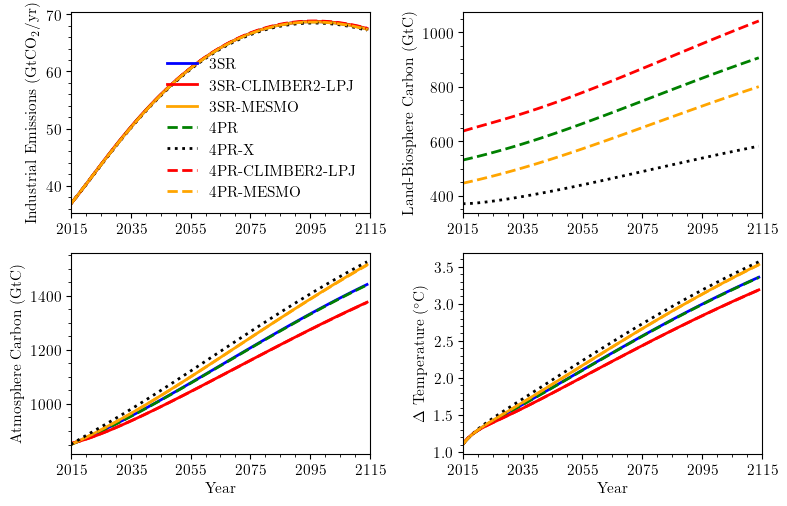

In [33]:

### READING THE DATA from cdice_3sr_pi_bau
path = root_run + '/cdice_3sr_pi_bau/3sr_pi_bau/'
exparams_3sr_pi = pd.read_csv(path + 'exoparams.csv')
states_3sr_pi = pd.read_csv(path +'states.csv')
ps_3sr_pi = pd.read_csv(path +'ps.csv')
def_3sr_pi = pd.read_csv(path +'defs.csv')
time_3sr_pi = pd.read_csv(path +'time.csv')

### READING THE DATA from cdice_3sr_pi_climber_bau
path = root_run + '/cdice_3sr_pi_climber_bau/3sr_pi_climber_bau/'
exparams_3sr_pi_climber_bau = pd.read_csv(path + 'exoparams.csv')
states_3sr_pi_climber_bau = pd.read_csv(path +'states.csv')
ps_3sr_pi_climber_bau = pd.read_csv(path +'ps.csv')
def_3sr_pi_climber_bau = pd.read_csv(path +'defs.csv')
time_3sr_pi_climber_bau = pd.read_csv(path +'time.csv')

### READING THE DATA from cdice_3sr_pi_mesmo_bau
path = root_run + '/cdice_3sr_pi_mesmo_bau/3sr_pi_mesmo_bau/'
exparams_3sr_pi_mesmo_bau = pd.read_csv(path + 'exoparams.csv')
states_3sr_pi_mesmo_bau = pd.read_csv(path +'states.csv')
ps_3sr_pi_mesmo_bau = pd.read_csv(path +'ps.csv')
def_3sr_pi_mesmo_bau = pd.read_csv(path +'defs.csv')
time_3sr_pi_mesmo_bau = pd.read_csv(path +'time.csv')

### READING THE DATA from  cdice_4pr_pi_bau
path = root_run + '/cdice_4pr_pi_bau/4pr_pi_bau/'
exparams_4pr_pi = pd.read_csv(path + 'exoparams.csv')
states_4pr_pi = pd.read_csv(path +'states.csv')
ps_4pr_pi = pd.read_csv(path +'ps.csv')
def_4pr_pi = pd.read_csv(path +'defs.csv')
time_4pr_pi = pd.read_csv(path +'time.csv')

### READING THE DATA from  cdice_4prx_pi_bau
path = root_run + '/cdice_4prx_pi_bau/4prx_pi_bau/'
exparams_4prx_pi = pd.read_csv(path + 'exoparams.csv')
states_4prx_pi = pd.read_csv(path +'states.csv')
ps_4prx_pi = pd.read_csv(path +'ps.csv')
def_4prx_pi = pd.read_csv(path +'defs.csv')
time_4prx_pi = pd.read_csv(path +'time.csv')

### READING THE DATA from cdice_4pr_pi_climber_bau
path = root_run + '/cdice_4pr_pi_climber_bau/4pr_pi_climber_bau/'
exparams_4pr_pi_climber_bau = pd.read_csv(path + 'exoparams.csv')
states_4pr_pi_climber_bau = pd.read_csv(path +'states.csv')
ps_4pr_pi_climber_bau = pd.read_csv(path +'ps.csv')
def_4pr_pi_climber_bau = pd.read_csv(path +'defs.csv')
time_4pr_pi_climber_bau = pd.read_csv(path +'time.csv')

### READING THE DATA from cdice_4pr_pi_mesmo_bau
path = root_run + '/cdice_4pr_pi_mesmo_bau/4pr_pi_mesmo_bau/'
exparams_4pr_pi_mesmo_bau = pd.read_csv(path + 'exoparams.csv')
states_4pr_pi_mesmo_bau = pd.read_csv(path +'states.csv')
ps_4pr_pi_mesmo_bau = pd.read_csv(path +'ps.csv')
def_4pr_pi_mesmo_bau = pd.read_csv(path +'defs.csv')
time_4pr_pi_mesmo_bau = pd.read_csv(path +'time.csv')

init_year = 2015
ts = time_3sr_pi['time'] + init_year

tl = 100
fin_year = 2115

fig, axs = make_plot(2,2)

###################### MAT ############################################
de = 'MATx'

de_3sr_pi = states_3sr_pi[de]
de_3sr_pi_climber = states_3sr_pi_climber_bau[de]
de_3sr_pi_mesmo = states_3sr_pi_mesmo_bau[de]
de_4pr_pi = states_4pr_pi[de]
de_4prx_pi = states_4prx_pi[de]
de_4pr_pi_climber = states_4pr_pi_climber_bau[de]
de_4pr_pi_mesmo = states_4pr_pi_mesmo_bau[de]


df_mass = pd.DataFrame({"time":[2020, 2050, 2100],
                        "3SR":[de_3sr_pi[5], de_3sr_pi[35],de_3sr_pi[85]],
                    "3SR-CLIMBER":[de_3sr_pi_climber[5], de_3sr_pi_climber[35],de_3sr_pi_climber[85]],
                    "3SR-MESMO":[de_3sr_pi_mesmo[5], de_3sr_pi_mesmo[35],de_3sr_pi_mesmo[85]],
                      "4PR":[de_4pr_pi[5], de_4pr_pi[35],de_4pr_pi[85]],
                      "4PR-X":[de_4prx_pi[5], de_4prx_pi[35],de_4prx_pi[85]],
                    "4PR-CLIMBER":[de_4pr_pi_climber[5], de_4pr_pi_climber[35],de_4pr_pi_climber[85]],
                    "4PR-MESMO":[de_4pr_pi_mesmo[5], de_4pr_pi_mesmo[35],de_4pr_pi_mesmo[85]] })


x = ts[0:tl]

axs[1,0].plot(x, de_3sr_pi[0:tl],   linewidth=2,color=plot_color_3sr,  linestyle=plot_style_3sr, label=plot_label_3sr)

axs[1,0].plot(x, de_3sr_pi_climber[0:tl],   linewidth=2,color=plot_color_3sr_climber,  linestyle=plot_style_3sr_climber, label=plot_label_3sr_climber)
axs[1,0].plot(x, de_3sr_pi_mesmo[0:tl],   linewidth=2,color=plot_color_3sr_mesmo,  linestyle=plot_style_3sr_mesmo, label=plot_label_3sr_mesmo)

axs[1,0].plot(x, de_4pr_pi[0:tl],   linewidth=2,color=plot_color_4pr, linestyle=plot_style_4pr, label=plot_label_4pr)
axs[1,0].plot(x, de_4pr_pi_climber[0:tl],   linewidth=2,color=plot_color_4pr_climber,  linestyle=plot_style_4pr_climber, label=plot_label_4pr_climber)
axs[1,0].plot(x, de_4pr_pi_mesmo[0:tl],   linewidth=2,color=plot_color_4pr_mesmo,  linestyle=plot_style_4pr_mesmo, label=plot_label_4pr_mesmo)
axs[1,0].plot(x, de_4prx_pi[0:tl], linewidth=2,color=plot_color_4prx,linestyle=plot_style_4prx,label=plot_label_4prx)

axs[1,0].set_ylabel(r'GtC')
axs[1,0].set_xlim([init_year,fin_year])


###################### MLF ############################################
de = 'MLFx'

de_4pr_pi = states_4pr_pi[de]
de_4prx_pi = states_4prx_pi[de]
de_4pr_pi_climber = states_4pr_pi_climber_bau[de]
de_4pr_pi_mesmo = states_4pr_pi_mesmo_bau[de]


x = ts[0:tl]

axs[0,1].plot(x, de_4pr_pi[0:tl], linewidth=2,color=plot_color_4pr, linestyle=plot_style_4pr, label=plot_label_4pr)
axs[0,1].plot(x, de_4prx_pi[0:tl], linewidth=2,color=plot_color_4prx,linestyle=plot_style_4prx,label=plot_label_4prx)
axs[0,1].plot(x, de_4pr_pi_climber[0:tl],   linewidth=2,color=plot_color_4pr_climber,  linestyle=plot_style_4pr_climber, label=plot_label_4pr_climber)
axs[0,1].plot(x, de_4pr_pi_mesmo[0:tl],   linewidth=2,color=plot_color_4pr_mesmo,  linestyle=plot_style_4pr_mesmo, label=plot_label_4pr_mesmo)


axs[0,1].set_ylabel(r'GtC')
axs[0,1].set_xlim([init_year,fin_year])


###################### TAT ############################################
de = 'TATx'

de_3sr_pi = states_3sr_pi[de]
de_3sr_pi_climber = states_3sr_pi_climber_bau[de]
de_3sr_pi_mesmo = states_3sr_pi_mesmo_bau[de]
de_4pr_pi = states_4pr_pi[de]
de_4prx_pi = states_4prx_pi[de]
de_4pr_pi_climber = states_4pr_pi_climber_bau[de]
de_4pr_pi_mesmo = states_4pr_pi_mesmo_bau[de]


df_temp = pd.DataFrame({"time":[2020, 2050, 2100],
                        "3SR":[de_3sr_pi[5], de_3sr_pi[35],de_3sr_pi[85]],
                    "3SR-CLIMBER":[de_3sr_pi_climber[5], de_3sr_pi_climber[35],de_3sr_pi_climber[85]],
                    "3SR-MESMO":[de_3sr_pi_mesmo[5], de_3sr_pi_mesmo[35],de_3sr_pi_mesmo[85]],
                      "4PR":[de_4pr_pi[5], de_4pr_pi[35],de_4pr_pi[85]],
                    "4PR-CLIMBER":[de_4pr_pi_climber[5], de_4pr_pi_climber[35],de_4pr_pi_climber[85]],
                    "4PR-MESMO":[de_4pr_pi_mesmo[5], de_4pr_pi_mesmo[35],de_4pr_pi_mesmo[85]],
                      "4PR-X":[de_4prx_pi[5], de_4prx_pi[35],de_4prx_pi[85]]
                       })



x = ts[0:tl]

axs[1,1].plot(x, de_3sr_pi[0:tl], linewidth=2,color=plot_color_3sr,  linestyle=plot_style_3sr, label=plot_label_3sr)

axs[1,1].plot(x, de_3sr_pi_climber[0:tl],   linewidth=2,color=plot_color_3sr_climber,  linestyle=plot_style_3sr_climber, label=plot_label_3sr_climber)
axs[1,1].plot(x, de_3sr_pi_mesmo[0:tl],   linewidth=2,color=plot_color_3sr_mesmo,  linestyle=plot_style_3sr_mesmo, label=plot_label_3sr_mesmo)

axs[1,1].plot(x, de_4pr_pi[0:tl], linewidth=2,color=plot_color_4pr, linestyle=plot_style_4pr, label=plot_label_4pr)
axs[1,1].plot(x, de_4prx_pi[0:tl], linewidth=2,color=plot_color_4prx,linestyle=plot_style_4prx,label=plot_label_4prx)

axs[1,1].plot(x, de_4pr_pi_climber[0:tl],   linewidth=2,color=plot_color_4pr_climber,  linestyle=plot_style_4pr_climber, label=plot_label_4pr_climber)
axs[1,1].plot(x, de_4pr_pi_mesmo[0:tl],   linewidth=2,color=plot_color_4pr_mesmo,  linestyle=plot_style_4pr_mesmo, label=plot_label_4pr_mesmo)



axs[1,1].set_ylabel(r'deg. C')
axs[1,1].set_xlim([init_year,fin_year])


###################### eind ############################################ 
de = 'Eind'

de_3sr_pi = def_3sr_pi[de]
de_3sr_pi_climber = def_3sr_pi_climber_bau[de]
de_3sr_pi_mesmo = def_3sr_pi_mesmo_bau[de]
de_4pr_pi = def_4pr_pi[de]
de_4prx_pi = def_4prx_pi[de]
de_4pr_pi_climber = def_4pr_pi_climber_bau[de]
de_4pr_pi_mesmo = def_4pr_pi_mesmo_bau[de]


x = ts[0:tl]

axs[0,0].plot(x, de_3sr_pi[0:tl], linewidth=2,color=plot_color_3sr,  linestyle=plot_style_3sr, label=plot_label_3sr)

axs[0,0].plot(x, de_3sr_pi_climber[0:tl],   linewidth=2,color=plot_color_3sr_climber,  linestyle=plot_style_3sr_climber, label=plot_label_3sr_climber)
axs[0,0].plot(x, de_3sr_pi_mesmo[0:tl],   linewidth=2,color=plot_color_3sr_mesmo,  linestyle=plot_style_3sr_mesmo, label=plot_label_3sr_mesmo)

axs[0,0].plot(x, de_4pr_pi[0:tl],  linewidth=2,color=plot_color_4pr, linestyle=plot_style_4pr, label=plot_label_4pr)
axs[0,0].plot(x, de_4prx_pi[0:tl],linewidth=2,color=plot_color_4prx,linestyle=plot_style_4prx,label=plot_label_4prx)

axs[0,0].plot(x, de_4pr_pi_climber[0:tl],   linewidth=2,color=plot_color_4pr_climber,  linestyle=plot_style_4pr_climber, label=plot_label_4pr_climber)
axs[0,0].plot(x, de_4pr_pi_mesmo[0:tl],   linewidth=2,color=plot_color_4pr_mesmo,  linestyle=plot_style_4pr_mesmo, label=plot_label_4pr_mesmo)


axs[0,0].legend(frameon=False,loc='lower right',ncol=1)
axs[0,0].set_xlim([init_year,fin_year])

axs[0,0].set_ylabel(r'Industrial Emissions (GtCO$_2$/yr)')
axs[0,1].set_ylabel(r'Land-Biosphere Carbon (GtC)')
axs[1,0].set_ylabel(r'Atmosphere Carbon (GtC)')
axs[1,1].set_ylabel(r'$\Delta$ Temperature (($^\circ$C))')


axs[1,1].set_ylabel(r'$\Delta$ Temperature ($^\circ$C)')

axs[-1,0].set_xlabel(r'Year')
axs[-1,1].set_xlabel(r'Year')

axs[0,0].set_xticks([2015, 2035, 2055, 2075, 2095, 2115])
axs[0,1].set_xticks([2015, 2035, 2055, 2075, 2095, 2115])
axs[1,0].set_xticks([2015, 2035, 2055, 2075, 2095, 2115])
axs[1,1].set_xticks([2015, 2035, 2055, 2075, 2095, 2115])


axs[0,0].minorticks_on()
axs[0,1].minorticks_on()
axs[1,0].minorticks_on()
axs[1,1].minorticks_on()


fig.savefig(root_save + 'Figure_5.png',dpi=300) 



# Table 3

In [35]:
def make_latex_table_mass_temp(df_mass, df_temp,
                        caption=None, label="tab:bau",
                        mass_decimals=2, temp_decimals=2):
    """
    df_mass/df_temp: DataFrames with columns ['time','3PR','4PR','4PR-X'] for
                     selected years (e.g., 2020, 2050, 2100).
    """
    mass = _prepare_pr(df_mass)
    temp = _prepare_pr(df_temp)

    lines = []
    lines.append("\\begin{table}[ht]")
    lines.append("    \\centering")
    lines.append("    \\begin{tabular}{c|c|c|c|c|c}")
    lines.append("        \\toprule")
    lines.append("        Year & Variable & 3SR (1) & 4PR (2) & 4PR-X (3) & diff (1) \\& (3) \\\\")
    lines.append("        \\midrule")

    # Mass rows
    for _, r in mass.iterrows():
        year = int(r["Year"])
        var_tex = f"${{\\bb{{m}}_t^{{\\text{{A}}}}}}_{{{year}}}$ (GtC)"
        lines.append(_row(year, var_tex, "GtC", r, decimals=mass_decimals))

    lines.append("        \\hline")

    # Temperature rows
    for _, r in temp.iterrows():
        year = int(r["Year"])
        var_tex = f"$\\bb{{T}}^{{\\text{{A}}}}_{{{year}}}$ ($^\\circ$C)"
        lines.append(_row(year, var_tex, "$^\\circ$C", r, decimals=temp_decimals))

    lines.append("        \\bottomrule")
    lines.append("    \\end{tabular}")

    if caption is None:
        caption = ("Data for atmospheric carbon mass "
                   "(${\\bb{m}_{t}^{\\text{A}}}$) and atmospheric temperature "
                   "($\\bb{T}^{\\text{A}}_{t}$) across selected years. "
                   "Absolute differences are 4PR-X relative to 3PR, with percentage differences in parentheses.")
    lines.append(f"     \\caption{{{caption}}}")
    lines.append(f"    \\label{{{label}}}")
    lines.append("\\end{table}")

    return "\n".join(lines)

# ---------------------------
# Example usage
# ---------------------------

latex_str = make_latex_table_mass_temp(df_mass, df_temp)
print(latex_str)
with open(root_save + "table_3.tex", "w") as f: f.write(latex_str)



\begin{table}[ht]
    \centering
    \begin{tabular}{c|c|c|c|c|c}
        \toprule
        Year & Variable & 3SR (1) & 4PR (2) & 4PR-X (3) & diff (1) \& (3) \\
        \midrule
        2020 & ${\bb{m}_t^{\text{A}}}_{2020}$ (GtC) & 874.37 & 873.52 & 883.14 & 8.77 GtC (1.00\%) \\
        2050 & ${\bb{m}_t^{\text{A}}}_{2050}$ (GtC) & 1046.07 & 1045.01 & 1085.54 & 39.47 GtC (3.77\%) \\
        2100 & ${\bb{m}_t^{\text{A}}}_{2100}$ (GtC) & 1363.19 & 1361.66 & 1439.97 & 76.78 GtC (5.63\%) \\
        \hline
        2020 & $\bb{T}^{\text{A}}_{2020}$ ($^\circ$C) & 1.29 & 1.29 & 1.30 & 0.01 $^\circ$C (0.99\%) \\
        2050 & $\bb{T}^{\text{A}}_{2050}$ ($^\circ$C) & 1.99 & 1.98 & 2.10 & 0.12 $^\circ$C (5.84\%) \\
        2100 & $\bb{T}^{\text{A}}_{2100}$ ($^\circ$C) & 3.09 & 3.09 & 3.29 & 0.20 $^\circ$C (6.34\%) \\
        \bottomrule
    \end{tabular}
     \caption{Data for atmospheric carbon mass (${\bb{m}_{t}^{\text{A}}}$) and atmospheric temperature ($\bb{T}^{\text{A}}_{t}$) across selected

# Figure 6

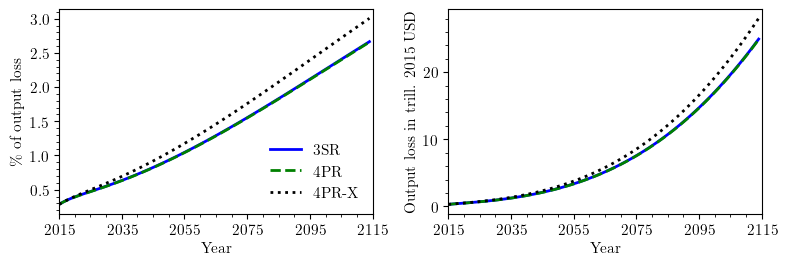

In [36]:

### READING THE DATA from cdice_3sr_pi_bau
path = root_run + '/cdice_3sr_pi_bau/3sr_pi_bau/'
exparams_3sr_pi = pd.read_csv(path + 'exoparams.csv')
states_3sr_pi = pd.read_csv(path +'states.csv')
ps_3sr_pi = pd.read_csv(path +'ps.csv')
def_3sr_pi = pd.read_csv(path +'defs.csv')
time_3sr_pi = pd.read_csv(path +'time.csv')

### READING THE DATA from  cdice_4pr_pi_bau
path = root_run + '/cdice_4pr_pi_bau/4pr_pi_bau/'
exparams_4pr_pi = pd.read_csv(path + 'exoparams.csv')
states_4pr_pi = pd.read_csv(path +'states.csv')
ps_4pr_pi = pd.read_csv(path +'ps.csv')
def_4pr_pi = pd.read_csv(path +'defs.csv')
time_4pr_pi = pd.read_csv(path +'time.csv')

### READING THE DATA from  cdice_4prx_pi_bau
path = root_run + '/cdice_4prx_pi_bau/4prx_pi_bau/'
exparams_4prx_pi = pd.read_csv(path + 'exoparams.csv')
states_4prx_pi = pd.read_csv(path +'states.csv')
ps_4prx_pi = pd.read_csv(path +'ps.csv')
def_4prx_pi = pd.read_csv(path +'defs.csv')
time_4prx_pi = pd.read_csv(path +'time.csv')

init_year = 2015
ts = time_3sr_pi['time'] + init_year

tl = 100
fin_year = 2115

fig, axs = make_plot(1,2)

###################### Omega ############################################
de = 'Omega'

de_3sr_pi = def_3sr_pi[de]*100
de_4pr_pi = def_4pr_pi[de]*100
de_4prx_pi = def_4prx_pi[de]*100


df_Omega = pd.DataFrame({"time":[2020, 2050, 2100],
                        "3SR":[de_3sr_pi[5], de_3sr_pi[35],de_3sr_pi[85]],
                      "4PR":[de_4pr_pi[5], de_4pr_pi[35],de_4pr_pi[85]],
                      "4PR-X":[de_4prx_pi[5], de_4prx_pi[35],de_4prx_pi[85]] })


x = ts[0:tl]

axs[0,0].plot(x, de_3sr_pi[0:tl],   linewidth=2,color=plot_color_3sr,  linestyle=plot_style_3sr, label=plot_label_3sr)

axs[0,0].plot(x, de_4pr_pi[0:tl],   linewidth=2,color=plot_color_4pr, linestyle=plot_style_4pr, label=plot_label_4pr)

axs[0,0].plot(x, de_4prx_pi[0:tl], linewidth=2,color=plot_color_4prx,linestyle=plot_style_4prx,label=plot_label_4prx)

axs[0,0].set_ylabel(r'Trillion 2015 USD')
#axs[1,0].legend(loc='lower right')
axs[0,0].set_xlim([init_year,fin_year])
#axs[1,1].savefig('figs_bau_100_MATx.png',dpi=300) 



###################### Dam ############################################
de = 'Dam'

de_3sr_pi = def_3sr_pi[de]
de_4pr_pi = def_4pr_pi[de]
de_4prx_pi = def_4prx_pi[de]


df_Dam = pd.DataFrame({"time":[2020, 2050, 2100],
                        "3SR":[de_3sr_pi[5], de_3sr_pi[35],de_3sr_pi[85]],
                      "4PR":[de_4pr_pi[5], de_4pr_pi[35],de_4pr_pi[85]],
                      "4PR-X":[de_4prx_pi[5], de_4prx_pi[35],de_4prx_pi[85]]
                      })

#--------------------- end of computing the differences------------------------

x = ts[0:tl]

axs[0,1].plot(x, de_3sr_pi[0:tl], linewidth=2,color=plot_color_3sr,  linestyle=plot_style_3sr, label=plot_label_3sr)

axs[0,1].plot(x, de_4pr_pi[0:tl], linewidth=2,color=plot_color_4pr, linestyle=plot_style_4pr, label=plot_label_4pr)
axs[0,1].plot(x, de_4prx_pi[0:tl], linewidth=2,color=plot_color_4prx,linestyle=plot_style_4prx,label=plot_label_4prx)


axs[0,1].set_ylabel(r'Trillion 2015 USD')
axs[0,1].set_xlim([init_year,fin_year])

axs[0,0].legend(frameon=False,loc='lower right',ncol=1)
axs[0,0].set_xlim([init_year,fin_year])

axs[0,0].set_ylabel(r'$\%$ of output loss')

axs[0,1].set_ylabel(r'Output loss in trill. 2015 USD')

axs[-1,0].set_xlabel(r'Year')
axs[-1,1].set_xlabel(r'Year')

axs[0,0].set_xticks([2015, 2035, 2055, 2075, 2095, 2115])
axs[0,1].set_xticks([2015, 2035, 2055, 2075, 2095, 2115])


axs[0,0].minorticks_on()
axs[0,1].minorticks_on()

fig.savefig(root_save + 'Figure_6.png',dpi=300) 



# Table 4

In [37]:
def make_latex_table_dam(df_Omega, df_Dam,
                        caption=None, label="tab:dam",
                        Omega_decimals=2, Dam_decimals=2):
    """
    df_Omega/df_Dam: DataFrames with columns ['time','3SR','4PR','4PR-X'] for
                     selected years (e.g., 2020, 2050, 2100).
    """
    Omega = _prepare_pr(df_Omega)
    Dam = _prepare_pr(df_Dam)

    lines = []
    lines.append("\\begin{table}[ht]")
    lines.append("    \\centering")
    lines.append("    \\begin{tabular}{c|c|c|c|c|c}")
    lines.append("        \\toprule")
    # Header uses the detected base label (3SR or 3PR)
    lines.append(f"        Year & Variable & 3SR (1) & 4PR (2) & 4PR-X (3) & diff (1) \\& (3) \\\\")
    lines.append("        \\midrule")

    # Ω(T) rows
    for _, r in Omega.iterrows():
        year = int(r["Year"])
        var_tex = "$\\Omega\\left(\\bb{T}^{\\text{A}}_{t}\\right)$"
        lines.append(_row(year, var_tex, "p.p.", r, decimals=Omega_decimals))

    lines.append("        \\hline")

    # D_t rows
    for _, r in Dam.iterrows():
        year = int(r["Year"])
        var_tex = "$D_t$"
        lines.append(_row(year, var_tex, "(Trill 2015 USD)", r, decimals=Dam_decimals))

    lines.append("        \\bottomrule")
    lines.append("    \\end{tabular}")

    if caption is None:
        caption = ("Data for share of output loss and equivalent monetary loss across selected years. "
                   "Absolute differences are 4PR-X relative to 3SR, with percentage differences in parentheses.")
    lines.append(f"     \\caption{{{caption}}}")
    lines.append(f"    \\label{{{label}}}")
    lines.append("\\end{table}")

    return "\n".join(lines)

# ---------------------------
# Example usage
# ---------------------------

latex_str = make_latex_table_dam(df_Omega, df_Dam)
print(latex_str)
with open(root_save + "table_4.tex", "w") as f: f.write(latex_str)

\begin{table}[ht]
    \centering
    \begin{tabular}{c|c|c|c|c|c}
        \toprule
        Year & Variable & 3SR (1) & 4PR (2) & 4PR-X (3) & diff (1) \& (3) \\
        \midrule
        2020 & $\Omega\left(\bb{T}^{\text{A}}_{t}\right)$ & 0.39 & 0.39 & 0.40 & 0.01 p.p. (1.98\%) \\
        2050 & $\Omega\left(\bb{T}^{\text{A}}_{t}\right)$ & 0.93 & 0.93 & 1.04 & 0.11 p.p. (12.03\%) \\
        2100 & $\Omega\left(\bb{T}^{\text{A}}_{t}\right)$ & 2.26 & 2.25 & 2.56 & 0.30 p.p. (13.09\%) \\
        \hline
        2020 & $D_t$ & 0.49 & 0.49 & 0.50 & 0.01 (Trill 2015 USD) (1.73\%) \\
        2050 & $D_t$ & 2.67 & 2.66 & 2.98 & 0.31 (Trill 2015 USD) (11.68\%) \\
        2100 & $D_t$ & 17.06 & 17.01 & 19.23 & 2.17 (Trill 2015 USD) (12.69\%) \\
        \bottomrule
    \end{tabular}
     \caption{Data for share of output loss and equivalent monetary loss across selected years. Absolute differences are 4PR-X relative to 3SR, with percentage differences in parentheses.}
    \label{tab:dam}
\end{table}

# Figure 7

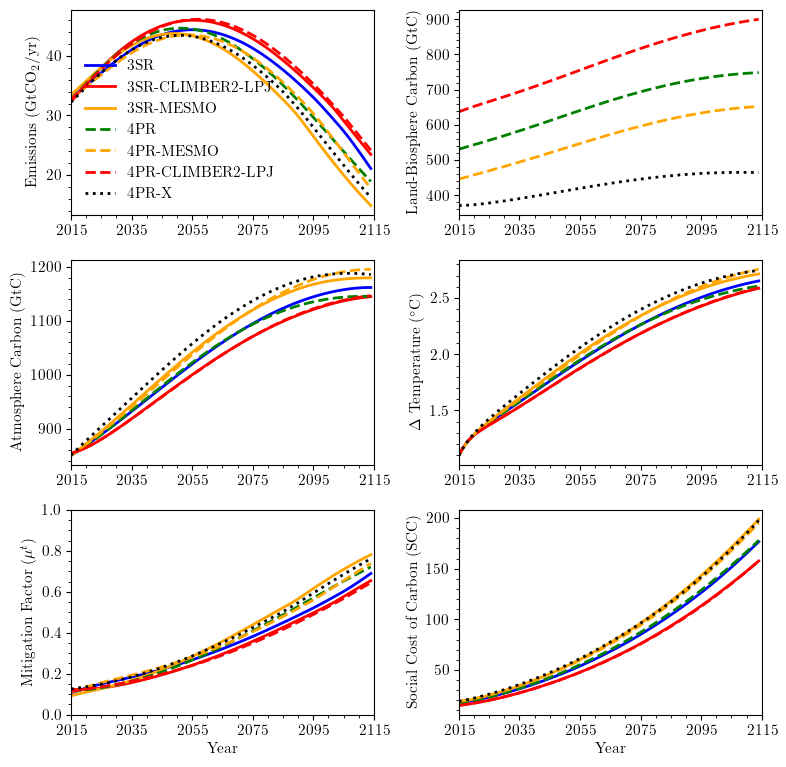

In [38]:
### READING THE DATA from cdice_3sr_pi
path = root_run + '/cdice_3sr_pi_opt/3sr_pi_opt/'

exparams_3sr_pi = pd.read_csv(path + 'exoparams.csv')
states_3sr_pi = pd.read_csv(path +'states.csv')
ps_3sr_pi = pd.read_csv(path +'ps.csv')
def_3sr_pi = pd.read_csv(path +'defs.csv')
time_3sr_pi = pd.read_csv(path +'time.csv')

### READING THE DATA from cdice_3sr_pi_climber
path = root_run +'/cdice_3sr_pi_climber_opt/3sr_pi_climber_opt/'
exparams_3sr_pi_climber = pd.read_csv(path + 'exoparams.csv')
states_3sr_pi_climber = pd.read_csv(path +'states.csv')
ps_3sr_pi_climber = pd.read_csv(path +'ps.csv')
def_3sr_pi_climber = pd.read_csv(path +'defs.csv')
time_3sr_pi_climber = pd.read_csv(path +'time.csv')

### READING THE DATA from cdice_3sr_pi_mesmo
path = root_run + '/cdice_3sr_pi_mesmo_opt/3sr_pi_mesmo_opt/'
exparams_3sr_pi_mesmo = pd.read_csv(path + 'exoparams.csv')
states_3sr_pi_mesmo = pd.read_csv(path +'states.csv')
ps_3sr_pi_mesmo = pd.read_csv(path +'ps.csv')
def_3sr_pi_mesmo = pd.read_csv(path +'defs.csv')
time_3sr_pi_mesmo = pd.read_csv(path +'time.csv')

### READING THE DATA from  cdice_4pr_pi
path = root_run + '/cdice_4pr_pi_opt/4pr_pi_opt/'
exparams_4pr_pi = pd.read_csv(path + 'exoparams.csv')
states_4pr_pi = pd.read_csv(path +'states.csv')
ps_4pr_pi = pd.read_csv(path +'ps.csv')
def_4pr_pi = pd.read_csv(path +'defs.csv')
time_4pr_pi = pd.read_csv(path +'time.csv')

### READING THE DATA from  cdice_4prx_pi
path = root_run + '/cdice_4prx_pi_opt/4prx_pi_opt/'
exparams_4prx_pi = pd.read_csv(path + 'exoparams.csv')
states_4prx_pi = pd.read_csv(path +'states.csv')
ps_4prx_pi = pd.read_csv(path +'ps.csv')
def_4prx_pi = pd.read_csv(path +'defs.csv')
time_4prx_pi = pd.read_csv(path +'time.csv')

### READING THE DATA from  cdice_4pr_pi_climber
path = root_run + '/cdice_4pr_pi_climber_opt/4pr_pi_climber_opt/'
exparams_4pr_pi_climber = pd.read_csv(path + 'exoparams.csv')
states_4pr_pi_climber = pd.read_csv(path +'states.csv')
ps_4pr_pi_climber = pd.read_csv(path +'ps.csv')
def_4pr_pi_climber = pd.read_csv(path +'defs.csv')
time_4pr_pi_climber = pd.read_csv(path +'time.csv')

### READING THE DATA from  cdice_4pr_pi_mesmo
path = root_run + '/cdice_4pr_pi_mesmo_opt/4pr_pi_mesmo_opt/'
exparams_4pr_pi_mesmo = pd.read_csv(path + 'exoparams.csv')
states_4pr_pi_mesmo = pd.read_csv(path +'states.csv')
ps_4pr_pi_mesmo = pd.read_csv(path +'ps.csv')
def_4pr_pi_mesmo = pd.read_csv(path +'defs.csv')
time_4pr_pi_mesmo = pd.read_csv(path +'time.csv')


init_year = 2015
ts = time_3sr_pi['time'] + init_year

tl = 100
fin_year = 2115


fig, axs = make_plot(3,2)


# ###################### MAT ############################################
de = 'MATx'

de_3sr_pi = states_3sr_pi[de]
de_4pr_pi = states_4pr_pi[de]
de_3sr_pi_climber = states_3sr_pi_climber[de]
de_3sr_pi_mesmo = states_3sr_pi_mesmo[de]
de_4pr_pi_climber = states_4pr_pi_climber[de]
de_4pr_pi_mesmo = states_4pr_pi_mesmo[de]
de_4prx_pi = states_4prx_pi[de]



df_val = pd.DataFrame({"time":[2020, 2050, 2100],
                        "3SR":[de_3sr_pi[5], de_3sr_pi[35],de_3sr_pi[85]],
                    "3SR-CLIMBER":[de_3sr_pi_climber[5], de_3sr_pi_climber[35],de_3sr_pi_climber[85]],
                     "3SR-MESMO":[de_3sr_pi_mesmo[5], de_3sr_pi_mesmo[35],de_3sr_pi_mesmo[85]],
                      "4PR":[de_4pr_pi[5], de_4pr_pi[35],de_4pr_pi[85]],
                    "4PR-MESMO":[de_4pr_pi_mesmo[5], de_4pr_pi_mesmo[35],de_4pr_pi_mesmo[85]],
                    "4PR-CLIMBER":[de_4pr_pi_climber[5], de_4pr_pi_climber[35],de_4pr_pi_climber[85]],
                      "4PR-X":[de_4prx_pi[5], de_4prx_pi[35],de_4prx_pi[85]]
                       })


x = ts[0:tl]

axs[1,0].plot(x, de_3sr_pi[0:tl], linewidth=2,color=plot_color_3sr,  linestyle=plot_style_3sr, label=plot_label_3sr)
axs[1,0].plot(x, de_3sr_pi_climber[0:tl], linewidth=2,color=plot_color_3sr_climber,  linestyle=plot_style_3sr_climber, label=plot_label_3sr_climber)
axs[1,0].plot(x, de_3sr_pi_mesmo[0:tl], linewidth=2,color=plot_color_3sr_mesmo,  linestyle=plot_style_3sr_mesmo, label=plot_label_3sr_mesmo)
axs[1,0].plot(x, de_4pr_pi[0:tl], linewidth=2,color=plot_color_4pr, linestyle=plot_style_4pr, label=plot_label_4pr)
axs[1,0].plot(x, de_4pr_pi_mesmo[0:tl],linewidth=2,color=plot_color_4pr_mesmo, linestyle=plot_style_4pr_mesmo, label=plot_label_4pr_mesmo)
axs[1,0].plot(x, de_4pr_pi_climber[0:tl], linewidth=2,color=plot_color_4pr_climber,linestyle=plot_style_4pr_climber,label=plot_label_4pr_climber)
axs[1,0].plot(x, de_4prx_pi[0:tl],linewidth=2,color=plot_color_4prx,linestyle=plot_style_4prx,label=plot_label_4prx)
axs[1,0].set_xlim([init_year,fin_year])

###################### MLF ############################################
de = 'MLFx'

de_4pr_pi = states_4pr_pi[de]
de_4prx_pi = states_4prx_pi[de]
de_4pr_pi_climber = states_4pr_pi_climber[de]
de_4pr_pi_mesmo = states_4pr_pi_mesmo[de]


x = ts[0:tl]

axs[0,1].plot(x, de_4pr_pi[0:tl],linewidth=2,color=plot_color_4pr, linestyle=plot_style_4pr, label=plot_label_4pr)
axs[0,1].plot(x, de_4prx_pi[0:tl], linewidth=2,color=plot_color_4prx,linestyle=plot_style_4prx,label=plot_label_4prx)
axs[0,1].plot(x, de_4pr_pi_mesmo[0:tl],linewidth=2,color=plot_color_4pr_mesmo, linestyle=plot_style_4pr_mesmo, label=plot_label_4pr_mesmo)
axs[0,1].plot(x, de_4pr_pi_climber[0:tl], linewidth=2,color=plot_color_4pr_climber,linestyle=plot_style_4pr_climber,label=plot_label_4pr_climber)
axs[0,1].set_xlim([init_year,fin_year])

###################### TAT ############################################
de = 'TATx'

de_3sr_pi = states_3sr_pi[de]
de_4pr_pi = states_4pr_pi[de]
de_4prx_pi = states_4prx_pi[de]

de_3sr_pi_climber = states_3sr_pi_climber[de]
de_3sr_pi_mesmo = states_3sr_pi_mesmo[de]
de_4pr_pi_climber = states_4pr_pi_climber[de]
de_4pr_pi_mesmo = states_4pr_pi_mesmo[de]


df_val = pd.DataFrame({"time":[2020, 2050, 2100],
                        "3PR":[de_3sr_pi[5], de_3sr_pi[35],de_3sr_pi[85]],
                    "3SR-CLIMBER":[de_3sr_pi_climber[5], de_3sr_pi_climber[35],de_3sr_pi_climber[85]],
                    "3SR-MESMO":[de_3sr_pi_mesmo[5], de_3sr_pi_mesmo[35],de_3sr_pi_mesmo[85]],
                      "4PR":[de_4pr_pi[5], de_4pr_pi[35],de_4pr_pi[85]],
                    "4PR-MESMO":[de_4pr_pi_mesmo[5], de_4pr_pi_mesmo[35],de_4pr_pi_mesmo[85]],
                    "4PR-CLIMBER":[de_4pr_pi_climber[5], de_4pr_pi_climber[35],de_4pr_pi_climber[85]],
                      "4PR-X":[de_4prx_pi[5], de_4prx_pi[35],de_4prx_pi[85]] })


x = ts[0:tl]

axs[1,1].plot(x, de_3sr_pi[0:tl], linewidth=2,color=plot_color_3sr,  linestyle=plot_style_3sr, label=plot_label_3sr)
axs[1,1].plot(x, de_3sr_pi_climber[0:tl], linewidth=2,color=plot_color_3sr_climber,  linestyle=plot_style_3sr_climber, label=plot_label_3sr_climber)
axs[1,1].plot(x, de_3sr_pi_mesmo[0:tl], linewidth=2,color=plot_color_3sr_mesmo,  linestyle=plot_style_3sr_mesmo, label=plot_label_3sr_mesmo)
axs[1,1].plot(x, de_4pr_pi[0:tl], linewidth=2,color=plot_color_4pr, linestyle=plot_style_4pr, label=plot_label_4pr)
axs[1,1].plot(x, de_4pr_pi_mesmo[0:tl],linewidth=2,color=plot_color_4pr_mesmo, linestyle=plot_style_4pr_mesmo, label=plot_label_4pr_mesmo)
axs[1,1].plot(x, de_4pr_pi_climber[0:tl], linewidth=2,color=plot_color_4pr_climber,linestyle=plot_style_4pr_climber,label=plot_label_4pr_climber)
axs[1,1].plot(x, de_4prx_pi[0:tl], linewidth=2,color=plot_color_4prx,linestyle=plot_style_4prx,label=plot_label_4prx)
axs[1,1].set_xlim([init_year,fin_year])


###################### muy ############################################
de = 'muy'

de_3sr_pi = ps_3sr_pi[de]
de_4pr_pi = ps_4pr_pi[de]
de_4prx_pi = ps_4prx_pi[de]
de_3sr_pi_climber = ps_3sr_pi_climber[de]
de_3sr_pi_mesmo = ps_3sr_pi_mesmo[de]
de_4pr_pi_climber = ps_4pr_pi_climber[de]
de_4pr_pi_mesmo = ps_4pr_pi_mesmo[de]


x = ts[0:tl]

axs[2,0].plot(x, de_3sr_pi[0:tl], linewidth=2,color=plot_color_3sr,  linestyle=plot_style_3sr, label=plot_label_3sr)
axs[2,0].plot(x, de_3sr_pi_climber[0:tl], linewidth=2,color=plot_color_3sr_climber,  linestyle=plot_style_3sr_climber, label=plot_label_3sr_climber)
axs[2,0].plot(x, de_3sr_pi_mesmo[0:tl], linewidth=2,color=plot_color_3sr_mesmo,  linestyle=plot_style_3sr_mesmo, label=plot_label_3sr_mesmo)
axs[2,0].plot(x, de_4pr_pi[0:tl], linewidth=2,color=plot_color_4pr, linestyle=plot_style_4pr, label=plot_label_4pr)
axs[2,0].plot(x, de_4pr_pi_mesmo[0:tl],linewidth=2,color=plot_color_4pr_mesmo, linestyle=plot_style_4pr_mesmo, label=plot_label_4pr_mesmo)
axs[2,0].plot(x, de_4pr_pi_climber[0:tl], linewidth=2,color=plot_color_4pr_climber,linestyle=plot_style_4pr_climber,label=plot_label_4pr_climber)
axs[2,0].plot(x, de_4prx_pi[0:tl], linewidth=2,color=plot_color_4prx,linestyle=plot_style_4prx,label=plot_label_4prx)
axs[2,0].set_xlim([init_year,fin_year])

###################### scc ############################################
de = 'scc'

de_3sr_pi = def_3sr_pi[de]
de_4pr_pi = def_4pr_pi[de]
de_4prx_pi = def_4prx_pi[de]
de_3sr_pi_climber = def_3sr_pi_climber[de]
de_3sr_pi_mesmo = def_3sr_pi_mesmo[de]
de_4pr_pi_climber = def_4pr_pi_climber[de]
de_4pr_pi_mesmo = def_4pr_pi_mesmo[de]


df_scc = pd.DataFrame({"time":[2020, 2050, 2100],
                        "3SR":[de_3sr_pi[5], de_3sr_pi[35],de_3sr_pi[85]],
                    "3SR-CLIMBER":[de_3sr_pi_climber[5], de_3sr_pi_climber[35],de_3sr_pi_climber[85]],
                    "3SR-MESMO":[de_3sr_pi_mesmo[5], de_3sr_pi_mesmo[35],de_3sr_pi_mesmo[85]],
                      "4PR":[de_4pr_pi[5], de_4pr_pi[35],de_4pr_pi[85]],
                    "4PR-MESMO":[de_4pr_pi_mesmo[5], de_4pr_pi_mesmo[35],de_4pr_pi_mesmo[85]],
                    "4PR-CLIMBER":[de_4pr_pi_climber[5], de_4pr_pi_climber[35],de_4pr_pi_climber[85]],
                      "4PR-X":[de_4prx_pi[5], de_4prx_pi[35],de_4prx_pi[85]] })



x = ts[0:tl]

axs[2,1].plot(x, de_3sr_pi[0:tl], linewidth=2,color=plot_color_3sr,  linestyle=plot_style_3sr, label=plot_label_3sr)
axs[2,1].plot(x, de_3sr_pi_climber[0:tl], linewidth=2,color=plot_color_3sr_climber,  linestyle=plot_style_3sr_climber, label=plot_label_3sr_climber)
axs[2,1].plot(x, de_3sr_pi_mesmo[0:tl], linewidth=2,color=plot_color_3sr_mesmo,  linestyle=plot_style_3sr_mesmo, label=plot_label_3sr_mesmo)
axs[2,1].plot(x, de_4pr_pi[0:tl], linewidth=2,color=plot_color_4pr, linestyle=plot_style_4pr, label=plot_label_4pr)
axs[2,1].plot(x, de_4pr_pi_mesmo[0:tl],linewidth=2,color=plot_color_4pr_mesmo, linestyle=plot_style_4pr_mesmo, label=plot_label_4pr_mesmo)
axs[2,1].plot(x, de_4pr_pi_climber[0:tl], linewidth=2,color=plot_color_4pr_climber,linestyle=plot_style_4pr_climber,label=plot_label_4pr_climber)
axs[2,1].plot(x, de_4prx_pi[0:tl],linewidth=2,color=plot_color_4prx,linestyle=plot_style_4prx,label=plot_label_4prx)
axs[2,1].set_xlim([init_year,fin_year])


SCC_3SR_opt  = de_3sr_pi[0:tl]
SCC_4PR_opt  = de_4pr_pi[0:tl]
SCC_4PRX_opt = de_4prx_pi[0:tl]

###################### eind ############################################
de = 'Eind'

de_3sr_pi = def_3sr_pi[de]
de_4pr_pi = def_4pr_pi[de]
de_4prx_pi = def_4prx_pi[de]
de_3sr_pi_climber = def_3sr_pi_climber[de]
de_3sr_pi_mesmo = def_3sr_pi_mesmo[de]
de_4pr_pi_climber = def_4pr_pi_climber[de]
de_4pr_pi_mesmo = def_4pr_pi_mesmo[de]

x = ts[0:tl]

axs[0,0].plot(x, de_3sr_pi[0:tl],    linewidth=2,color=plot_color_3sr,  linestyle=plot_style_3sr, label=plot_label_3sr)
axs[0,0].plot(x, de_3sr_pi_climber[0:tl], linewidth=2,color=plot_color_3sr_climber,  linestyle=plot_style_3sr_climber, label=plot_label_3sr_climber)
axs[0,0].plot(x, de_3sr_pi_mesmo[0:tl], linewidth=2,color=plot_color_3sr_mesmo,  linestyle=plot_style_3sr_mesmo, label=plot_label_3sr_mesmo)
axs[0,0].plot(x, de_4pr_pi[0:tl],    linewidth=2,color=plot_color_4pr, linestyle=plot_style_4pr, label=plot_label_4pr)
axs[0,0].plot(x, de_4pr_pi_mesmo[0:tl],linewidth=2,color=plot_color_4pr_mesmo, linestyle=plot_style_4pr_mesmo, label=plot_label_4pr_mesmo)
axs[0,0].plot(x, de_4pr_pi_climber[0:tl], linewidth=2,color=plot_color_4pr_climber,linestyle=plot_style_4pr_climber,label=plot_label_4pr_climber)
axs[0,0].plot(x, de_4prx_pi[0:tl], linewidth=2,color=plot_color_4prx,linestyle=plot_style_4prx,label=plot_label_4prx)
axs[0,0].set_xlim([init_year,fin_year])

axs[0,0].set_ylabel(r'Emissions (GtCO$_2$/yr)')
axs[0,1].set_ylabel(r'Land-Biosphere Carbon (GtC)')
axs[1,0].set_ylabel(r'Atmosphere Carbon (GtC)')
axs[1,1].set_ylabel(r'$\Delta$ Temperature ($^\circ$C)')
axs[2,0].set_ylabel(r'Mitigation Factor ($\mu^t$)')
axs[2,1].set_ylabel(r'Social Cost of Carbon (SCC)')

axs[2,0].set_ylim([0,1])
axs[-1,0].set_xlabel(r'Year')
axs[-1,1].set_xlabel(r'Year')

axs[0,0].set_xticks([2015, 2035, 2055, 2075, 2095, 2115])
axs[0,1].set_xticks([2015, 2035, 2055, 2075, 2095, 2115])
axs[1,0].set_xticks([2015, 2035, 2055, 2075, 2095, 2115])
axs[1,1].set_xticks([2015, 2035, 2055, 2075, 2095, 2115])
axs[2,0].set_xticks([2015, 2035, 2055, 2075, 2095, 2115])
axs[2,1].set_xticks([2015, 2035, 2055, 2075, 2095, 2115])

axs[0,0].minorticks_on()
axs[0,1].minorticks_on()
axs[1,0].minorticks_on()
axs[1,1].minorticks_on()
axs[2,0].minorticks_on()
axs[2,1].minorticks_on()

axs[0,0].legend(frameon=False,loc='lower left',ncol=1)


fig.savefig(root_save + 'Figure_7.png',dpi=300) 


# Table 5

In [39]:
def make_latex_table_scc(df_scc,
                        caption=None, label="tab:scc_opt",
                        scc_decimals=2):
    """
    df_scc: DataFrame with columns ['time','3SR','4PR','4PR-X'] for
                     selected years (e.g., 2020, 2050, 2100).
    """
    scc = _prepare_pr(df_scc)

    lines = []
    lines.append("\\begin{table}[ht]")
    lines.append("    \\centering")
    lines.append("    \\begin{tabular}{c|c|c|c|c|c}")
    lines.append("        \\toprule")
    # Header uses the detected base label (3SR or 3PR)
    lines.append(f"        Year & Variable & 3SR (1) & 4PR (2) & 4PR-X (3) & diff (1) \\& (3) \\\\")
    lines.append("        \\midrule")


    # SCC rows
    for _, r in scc.iterrows():
        year = int(r["Year"])
        var_tex = "$SCC$"
        lines.append(_row(year, var_tex, "(USD/tCO2)", r, decimals=scc_decimals))

    lines.append("        \\bottomrule")
    lines.append("    \\end{tabular}")

    if caption is None:
        caption = ("Social Cost of Carbon (2015 USD per ton of CO$_2$) across different years. "
                   "Absolute differences are 4PR-X relative to 3SR, with percentage differences in parentheses.")
    lines.append(f"     \\caption{{{caption}}}")
    lines.append(f"    \\label{{{label}}}")
    lines.append("\\end{table}")

    return "\n".join(lines)

# ---------------------------
# Example usage
# ---------------------------

latex_str = make_latex_table_scc(df_scc)
print(latex_str)
with open(root_save + "table_5.tex", "w") as f: f.write(latex_str)

\begin{table}[ht]
    \centering
    \begin{tabular}{c|c|c|c|c|c}
        \toprule
        Year & Variable & 3SR (1) & 4PR (2) & 4PR-X (3) & diff (1) \& (3) \\
        \midrule
        2020 & $SCC$ & 19.85 & 19.72 & 22.20 & 2.36 (USD/tCO2) (11.87\%) \\
        2050 & $SCC$ & 47.47 & 48.57 & 54.07 & 6.60 (USD/tCO2) (13.90\%) \\
        2100 & $SCC$ & 138.58 & 140.82 & 155.45 & 16.88 (USD/tCO2) (12.18\%) \\
        \bottomrule
    \end{tabular}
     \caption{Social Cost of Carbon (2015 USD per ton of CO$_2$) across different years. Absolute differences are 4PR-X relative to 3SR, with percentage differences in parentheses.}
    \label{tab:scc_opt}
\end{table}


# Figure 8

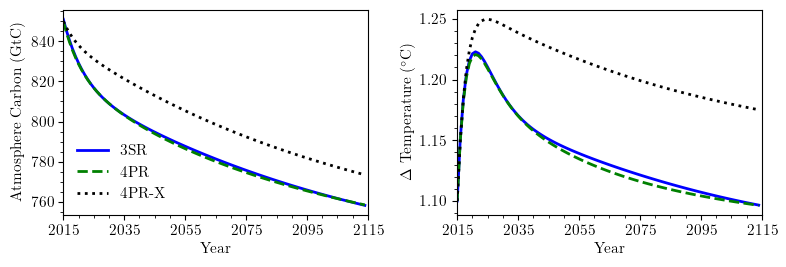

In [42]:
### READING THE DATA from cdice_3sr_pi with CCS technology
path = root_run + '/cdice_3sr_pi_ccs_opt/3sr_pi_ccs_opt/'
exparams_3sr_pi = pd.read_csv(path + 'exoparams.csv')
states_3sr_pi = pd.read_csv(path +'states.csv')
ps_3sr_pi = pd.read_csv(path +'ps.csv')
def_3sr_pi = pd.read_csv(path +'defs.csv')
time_3sr_pi = pd.read_csv(path +'time.csv')


### READING THE DATA from  cdice_4pr_pi with CCS technology
path = root_run + '/cdice_4pr_pi_ccs_opt/4pr_pi_ccs_opt/'
exparams_4pr_pi = pd.read_csv(path + 'exoparams.csv')
states_4pr_pi = pd.read_csv(path +'states.csv')
ps_4pr_pi = pd.read_csv(path +'ps.csv')
def_4pr_pi = pd.read_csv(path +'defs.csv')
time_4pr_pi = pd.read_csv(path +'time.csv')

### READING THE DATA from  cdice_4prx_pi with CCS technology
path = root_run + '/cdice_4prx_pi_ccs_opt/4prx_pi_ccs_opt/'
exparams_4prx_pi = pd.read_csv(path + 'exoparams.csv')
states_4prx_pi = pd.read_csv(path +'states.csv')
ps_4prx_pi = pd.read_csv(path +'ps.csv')
def_4prx_pi = pd.read_csv(path +'defs.csv')
time_4prx_pi = pd.read_csv(path +'time.csv')


init_year = 2015
ts = time_3sr_pi['time'] + init_year

tl = 100
fin_year = 2115

fig, axs = make_plot(1,2)

###################### MAT ############################################
de = 'MATx'

de_3sr_pi = states_3sr_pi[de]
de_4pr_pi = states_4pr_pi[de]
de_4prx_pi = states_4prx_pi[de]


df_val = pd.DataFrame({"time":[2020, 2050, 2100],
                        "3PR":[de_3sr_pi[5], de_3sr_pi[35],de_3sr_pi[85]],
                      "4PR":[de_4pr_pi[5], de_4pr_pi[35],de_4pr_pi[85]],
                      "4PR-X":[de_4prx_pi[5], de_4prx_pi[35],de_4prx_pi[85]] })


x = ts[0:tl]

axs[0,0].plot(x, de_3sr_pi[0:tl],   linewidth=2,color=plot_color_3sr,  linestyle=plot_style_3sr,  label=plot_label_3sr)
axs[0,0].plot(x, de_4pr_pi[0:tl],   linewidth=2,color=plot_color_4pr,  linestyle=plot_style_4pr,  label=plot_label_4pr)
axs[0,0].plot(x, de_4prx_pi[0:tl],linewidth=2,color=plot_color_4prx, linestyle=plot_style_4prx, label=plot_label_4prx)


axs[0,0].set_xlim([init_year,fin_year])

###################### carbontax / scc ############################################
de = 'carbontax'

de_3sr_pi = def_3sr_pi[de]
de_4pr_pi = def_4pr_pi[de]
de_4prx_pi = def_4prx_pi[de]

df_val = pd.DataFrame({"time":[2020, 2050, 2100],
                        "3PR":[de_3sr_pi[5], de_3sr_pi[35],de_3sr_pi[85]],
                      "4PR":[de_4pr_pi[5], de_4pr_pi[35],de_4pr_pi[85]],
                      "4PR-X":[de_4prx_pi[5], de_4prx_pi[35],de_4prx_pi[85]] })


x = ts[0:tl]


SCC_3SR_ccs  = de_3sr_pi[0:tl]
SCC_4PR_ccs  = de_4pr_pi[0:tl]
SCC_4PRX_ccs = de_4prx_pi[0:tl]


###################### TAT ############################################
de = 'TATx'

de_3sr_pi = states_3sr_pi[de]
de_4pr_pi = states_4pr_pi[de]
de_4prx_pi = states_4prx_pi[de]


df_temp1 = pd.DataFrame({"time":[2020, 2050, 2100],
                      "3SR":[de_3sr_pi[5],         de_3sr_pi[35],   de_3sr_pi[85]],
                      "4PR":[de_4pr_pi[5],         de_4pr_pi[35],   de_4pr_pi[85]],
                      "4PR-X":[de_4prx_pi[5],    de_4prx_pi[35],    de_4prx_pi[85]]})

x = ts[0:tl]

axs[0,1].plot(x, de_3sr_pi[0:tl],    linewidth=2, color=plot_color_3sr,  linestyle=plot_style_3sr,  label=plot_label_3sr)
axs[0,1].plot(x, de_4pr_pi[0:tl],    linewidth=2, color=plot_color_4pr,  linestyle=plot_style_4pr,  label=plot_label_4pr)
axs[0,1].plot(x, de_4prx_pi[0:tl], linewidth=2, color=plot_color_4prx, linestyle=plot_style_4prx, label=plot_label_4prx)

axs[0,1].set_xlim([init_year,fin_year])

axs[0,0].set_ylabel(r'Atmosphere Carbon (GtC)')
axs[0,1].set_ylabel(r'$\Delta$ Temperature ($^\circ$C)')


axs[-1,0].set_xlabel(r'Year')
axs[-1,1].set_xlabel(r'Year')

axs[0,0].set_xticks([2015, 2035, 2055, 2075, 2095, 2115])
axs[0,1].set_xticks([2015, 2035, 2055, 2075, 2095, 2115])


axs[0,0].minorticks_on()
axs[0,1].minorticks_on()


axs[0,0].legend(frameon=False,loc='lower left',ncol=1)

fig.savefig(root_save + 'Figure_8.png',dpi=300) 

# Table 6

In [43]:
def make_latex_table_temp(df_temp1,
                        caption=None, label="tab:ccs_data",
                        temp_decimals=2):
    """
    df_temp1: DataFrame with columns ['time','3PR','4PR','4PR-X'] for
                     selected years (e.g., 2020, 2050, 2100).
    """
    temp = _prepare_pr(df_temp1)

    lines = []
    lines.append("\\begin{table}[ht]")
    lines.append("    \\centering")
    lines.append("    \\begin{tabular}{c|c|c|c|c|c}")
    lines.append("        \\toprule")
    # Header uses the detected base label (3SR or 3PR)
    lines.append(f"        Year & Variable & 3SR (1) & 4PR (2) & 4PR-X (3) & diff (1) \\& (3) \\\\")
    lines.append("        \\midrule")

# Temperature rows
    for _, r in temp.iterrows():
        year = int(r["Year"])
        var_tex = f"$\\bb{{T}}^{{\\text{{A}}}}_{{{year}}}$ ($^\\circ$C)"
        lines.append(_row(year, var_tex, "$^\\circ$C", r, decimals=temp_decimals))

    lines.append("        \\bottomrule")
    lines.append("    \\end{tabular}")

    if caption is None:
        caption = ("Atmospheric temperature data ($\\bb{{T}}^{{\\text{{A}}}}_{t}$) across different years."
                   "Absolute differences are 4PR-X relative to 3PR, with percentage differences in parentheses.")
    lines.append(f"     \\caption{{{caption}}}")
    lines.append(f"    \\label{{{label}}}")
    lines.append("\\end{table}")

    return "\n".join(lines)

# ---------------------------
# Example usage
# ---------------------------

latex_str = make_latex_table_temp(df_temp1)
print(latex_str)
with open(root_save + "table_6.tex", "w") as f: f.write(latex_str)

\begin{table}[ht]
    \centering
    \begin{tabular}{c|c|c|c|c|c}
        \toprule
        Year & Variable & 3SR (1) & 4PR (2) & 4PR-X (3) & diff (1) \& (3) \\
        \midrule
        2020 & $\bb{T}^{\text{A}}_{2020}$ ($^\circ$C) & 1.22 & 1.22 & 1.23 & 0.01 $^\circ$C (1.11\%) \\
        2050 & $\bb{T}^{\text{A}}_{2050}$ ($^\circ$C) & 1.14 & 1.14 & 1.22 & 0.08 $^\circ$C (6.72\%) \\
        2100 & $\bb{T}^{\text{A}}_{2100}$ ($^\circ$C) & 1.10 & 1.10 & 1.18 & 0.08 $^\circ$C (7.09\%) \\
        \bottomrule
    \end{tabular}
     \caption{Atmospheric temperature data ($\bb{{T}}^{{\text{{A}}}}_{t}$) across different years.Absolute differences are 4PR-X relative to 3PR, with percentage differences in parentheses.}
    \label{tab:ccs_data}
\end{table}
